Purpose:

Rate Content from Wiki Data

In [9]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import tqdm
import matplotlib.pyplot as plt
import pickle
import time

with open('../data/raw/data.pkl', 'rb') as file:
    data = pickle.load(file)

In [2]:
def get_rotten(name):
    
    rotten_loc = 'https://www.rottentomatoes.com/tv/'+name
    finder = re.compile('[0-9]{1,3}')
    missing = re.compile('Tomatometer Not Available...')

  # Scrape
    rotten_requested = requests.get(rotten_loc)
    rotten_extract = rotten_requested.text
    rotten_soup = BeautifulSoup(rotten_extract,'html5lib')

    # Check 404
    if rotten_soup.find('h1').get_text().strip() == '404 - Not Found':
        return {'url':rotten_loc, 'critic':'-', 'audience':'-','status':'404'}

    else:
    # Critic
        try:
            crit = rotten_soup.find('div',{'id':'all-critics-numbers'})
            # Check if Missing
            if missing.search(crit.get_text()):
                crit = '-'
            # Extract critic if not missing
            else:
                crit = finder.search(crit.get_text()).group(0)
            # if fail
        except:
            crit = '-'

# Extract Audience
    try: 
        aud = rotten_soup.find('div',{'class':'audience-score meter'})
        aud = finder.search(aud.get_text()).group(0)
    # If Fail
    except:
        aud = '-'                     
    return {'name':name,'url':rotten_loc, 'critic':crit, 'audience':aud,'status':'success'}


def clean_for_rotten(to_frame):
    regex = re.compile('[^0-9a-zA-Z]+')
    regex_2 = re.compile('_{2}')

    collect = []
    for i in to_frame:
        to_collect = regex.sub('_',i[0])
        to_collect = regex_2.sub('_',to_collect)
        collect += [str(to_collect).lower()]
    return collect

def run_through_rottens(data_in):
    collected = []
    for i in tqdm.tqdm(data_in):
        time.sleep(np.random.uniform(0,3))
        collected += [get_rotten(i)]
    return collected

In [ ]:
    ['hulu', 'https://en.wikipedia.org/wiki/List_of_original_programs_distributed_by_Hulu'],
    ['netflix', 'https://en.wikipedia.org/wiki/List_of_original_programs_distributed_by_Netflix'],
    ['amazon', 'https://en.wikipedia.org/wiki/List_of_original_programs_distributed_by_Amazon'],
    ['hbo','https://en.wikipedia.org/wiki/List_of_programs_broadcast_by_HBO']

In [3]:
a = clean_for_rotten(data[0][3])
b = clean_for_rotten(data[1][3])
c = clean_for_rotten(data[2][3])
d = clean_for_rotten(data[3][3])

In [4]:
to_frame = data[0][3]

In [27]:
a_results = run_through_rottens(a)
b_results = run_through_rottens(b)
c_results = run_through_rottens(c)
d_results = run_through_rottens(d)

In [67]:
hulu = pd.DataFrame(a_results)
hulu['source'] = 'hulu'
netflix = pd.DataFrame(b_results)
netflix['source'] = 'netflix'
amazon = pd.DataFrame(c_results)
amazon['source'] = 'amazon'
hbo = pd.DataFrame(d_results)
hbo['source'] = 'hbo'

results

In [70]:
hulu.to_csv('../data/prepped/hulu_ratings.csv', index = False)
netflix.to_csv('../data/prepped/netflix_ratings.csv', index = False)
amazon.to_csv('../data/prepped/amazon_ratings.csv', index = False)
hbo.to_csv('../data/prepped/hbo_ratings.csv', index = False)

In [74]:
all_data = pd.concat([hulu, netflix, amazon, hbo], axis = 0)

all_data.to_csv('all_data.csv',index = False)

In [86]:
all_data.query('critic != "-"').astype(dtype = {'critic':int}).groupby('source').describe()

critic                                                       
         count       mean        std   min    25%   50%    75%    max
source                                                               
amazon    69.0  77.449275  18.557174  28.0  69.00  81.0  92.00  100.0
hbo       52.0  77.076923  17.182807  24.0  64.75  81.5  90.00  100.0
hulu      15.0  81.133333  16.813543  38.0  79.00  83.0  93.50   96.0
netflix  150.0  80.326667  20.540841   0.0  73.50  86.0  95.75  100.0

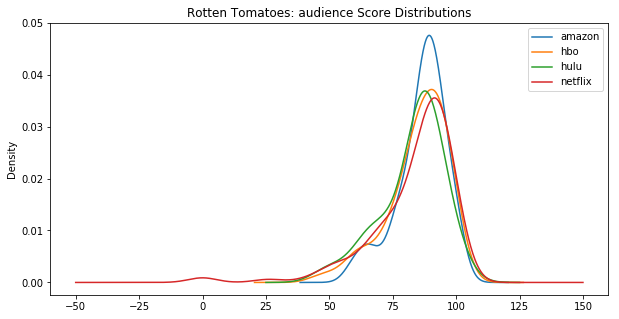

In [102]:
plt.figure(figsize = (10,5))

plt.show()


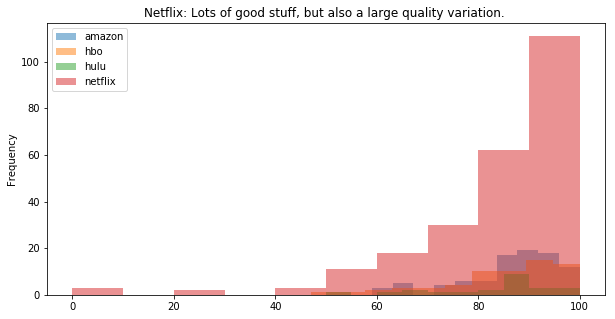

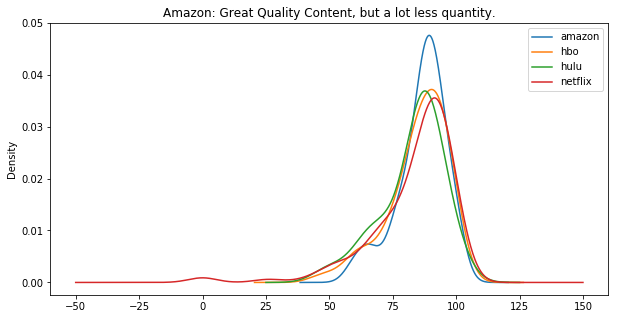

audience                                                       
           count       mean        std   min    25%   50%    75%    max
source                                                                 
amazon      90.0  86.322222   9.720623  59.0  82.25  88.0  93.00  100.0
hbo         62.0  84.935484  11.769467  47.0  80.25  87.5  92.75  100.0
hulu        23.0  82.695652  12.174619  50.0  77.50  86.0  89.50  100.0
netflix    240.0  83.083333  16.778190   0.0  76.75  88.0  93.25  100.0

In [109]:
plt.figure(figsize = (10,5))
plt.title('Netflix: Lots of good stuff, but also a large quality variation. ')
(
    all_data.query('audience != "-"').
    astype(dtype = {'audience':int}).
    groupby('source')['audience'].
    plot(kind = 'hist', legend = True, alpha = .5))




plt.show()

plt.figure(figsize = (10,5))

plt.title('Amazon: Great Quality Content, but a lot less quantity.')
(
    all_data.query('audience != "-"').
    astype(dtype = {'audience':int}).
    groupby('source')['audience'].
    plot(kind = 'density', legend = True))

plt.show()

all_data.query('audience != "-"').astype(dtype = {'audience':int}).groupby('source').describe()


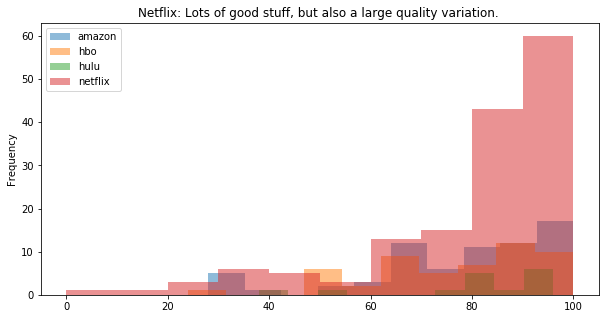

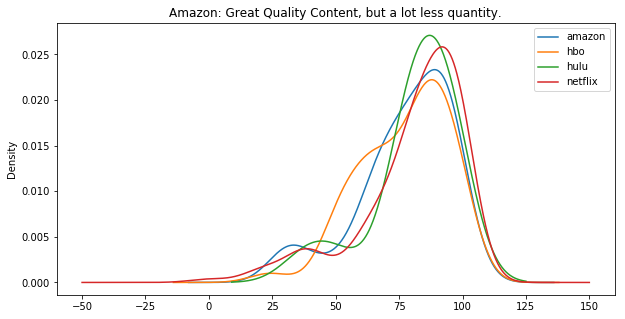

critic                                                       
         count       mean        std   min    25%   50%    75%    max
source                                                               
amazon    69.0  77.449275  18.557174  28.0  69.00  81.0  92.00  100.0
hbo       52.0  77.076923  17.182807  24.0  64.75  81.5  90.00  100.0
hulu      15.0  81.133333  16.813543  38.0  79.00  83.0  93.50   96.0
netflix  150.0  80.326667  20.540841   0.0  73.50  86.0  95.75  100.0

In [112]:
plt.figure(figsize = (10,5))
plt.title('Netflix: Lots of good stuff, but also a large quality variation. ')
(
    all_data.query('critic != "-"').
    astype(dtype = {'critic':int}).
    groupby('source')['critic'].
    plot(kind = 'hist', legend = True, alpha = .5))




plt.show()

plt.figure(figsize = (10,5))

plt.title('Amazon: Great Quality Content, but a lot less quantity.')
(
    all_data.query('critic != "-"').
    astype(dtype = {'critic':int}).
    groupby('source')['critic'].
    plot(kind = 'density', legend = True))

plt.show()

all_data.query('critic != "-"').astype(dtype = {'critic':int}).groupby('source').describe()
